In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Statistical basic information of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


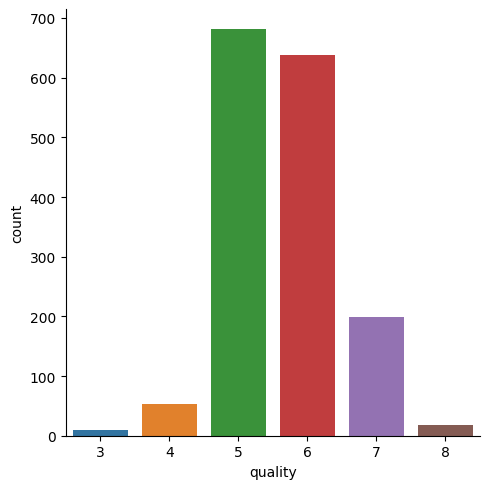

In [7]:
# Visualize the count of wine quality 
sns.catplot(x="quality",data=df,kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

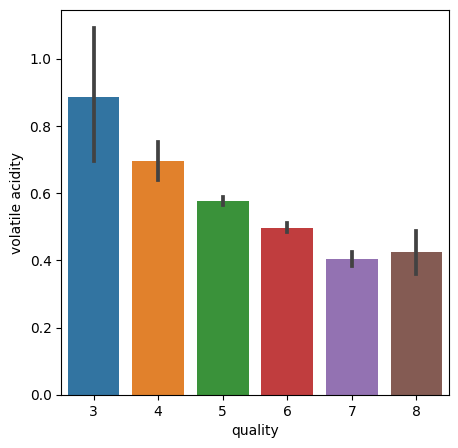

In [8]:
# Volatile acidity vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

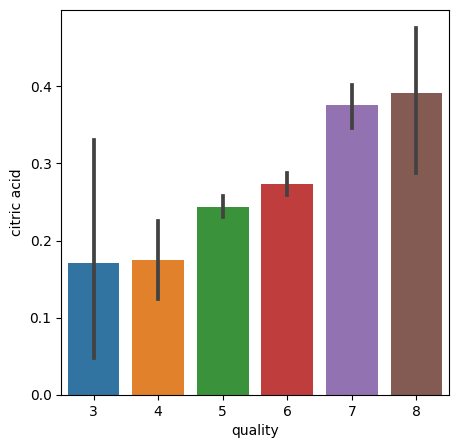

In [9]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

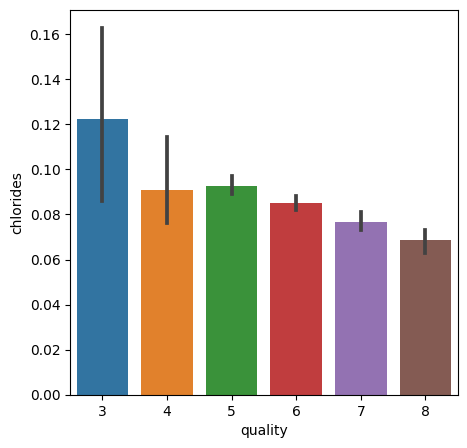

In [10]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="chlorides",data=df)

In [11]:
# Correlation 
# 1) Positive correlation
# 2) Negative correlation


In [12]:
correlation= df.corr()

<Axes: >

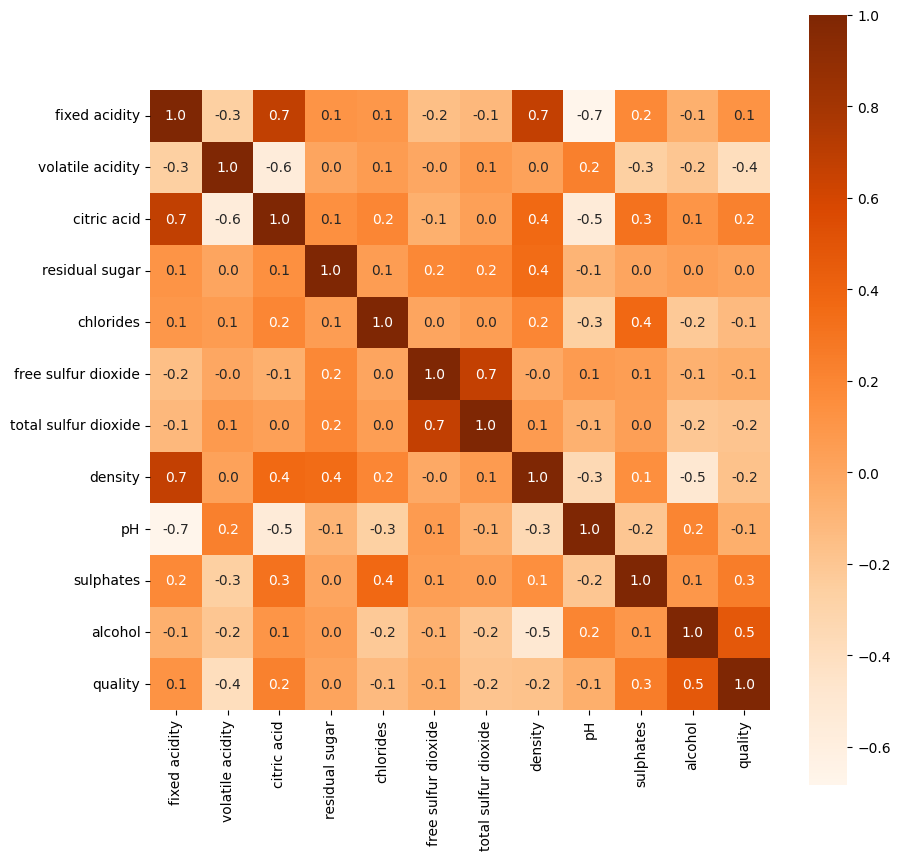

In [13]:
# Construction heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap="Oranges")

In [14]:
# From the above heatmap we get the, 
# Quality of wine is positively correlated to the alcohol
# and negatively correlated to volatile acidity

In [15]:
# Data preprocessing

In [16]:
# Seperete the data and label
x=df.drop("quality",axis=1)

In [17]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [18]:
# Label Binarization (Assigning or converting the data only true group good or bad)

In [19]:
# use lambda function to apply the values
y=df["quality"].apply(lambda y_value:1 if y_value>=7 else 0)

In [20]:
y.count

<bound method Series.count of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64>

In [21]:
# Train and Test the data
# x_train = all train values
# y_train = all label values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
# Check the size (shape) of the data for train and test
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [23]:
# Model Training
# Random Forest Classifier (Algorithm) 

In [24]:
model=RandomForestClassifier()

In [25]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
# Model Evaluation 

 ### Accuracy Score ###

In [27]:
# Accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [28]:
print("Accuracy :",test_data_accuracy)

Accuracy : 0.934375


In [29]:
# Building a Predictive System

In [30]:
# Gives input data except quality value

input_data=(8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2)

# Changing the input data into numpy array

In [31]:
# Create the array for the data and
# Reshape the array data
input_data_array=np.array(input_data).reshape(1,-1)

In [32]:
# Assign these values to prediction model

In [33]:
prediction=model.predict(input_data_array)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
print(prediction)

if(prediction[0]==1):
    print("Good Quality Wine")
else:
        print("Bad Quality wine")

[0]
Bad Quality wine
